<h1 style="font-family:Impact,Arial;font-size:70px;">Pandas &#8212;  Part I: Visualising the 2013 Australian Senate election</h1>
<h2 style="font-familﬁy:Arial;">Matias Quiroz (original: Adel Rahmani)</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:matias.quiroz@uts.edu.au" target="_blank">
<small><font color=MediumVioletRed>matias.quiroz@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

<div style="background-color:#F2FBEF;">
<h2><font color=#04B404>After completing this notebook you should:</font></h2>
<br>
<ul>
<li> Understand how to load spreadsheet data into a <code>pandas</code> dataframe. </li><br>
<li> Be able to perform basic data manipulation and visualisation. </li><br>
</ul>
</div>

<div style="background-color:#ADD8E6;">
<h2><font color=#00008B>Suggested way of working with the lecture notebooks:</font></h2>
<br>

<ul>
<li> Open a new empty notebook document through `File->New Notebook->Python 3 (ipykernel)` (or similar depending on version).</li><br>
<li> Keep two documents open. This notebook (or its HTML version) and the notebook you created above. </li><br>
<li> Type your solutions/code in the notebook you created. Avoid copy-pasting as much as possible: You need to develop the "muscle memory" that comes with writing code.</li><br>
</ul>
</div>

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Note:</font> </h3>
We refer to <em>Wes McKinney</em>'s book <b>Python for Data Analysis, 2nd edition</b> as <b>PDA</b>.<br>

(The page numbers refer to the PDF version of the ebook.)

<a href="http://pandas.pydata.org/"><img src=https://covers.oreillystatic.com/images/0636920050896/lrg.jpg width="150" /></a> <br>

The datasets used in the book are available from https://github.com/pydata/pydata-book.<br>

<p>If you want to download the entire repository to your computer you can use <code>git</code> to do it.<br> 

In the <code>Terminal</code> (or the command line console in Windows), go to the directory where you want to download the repository and enter:</p>
<pre><code>git clone https://github.com/pydata/pydata-book.git</code></pre>
<br>
</div>

In [1]:
from math import *
import numpy as np
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# colormap support from matplotlib
from matplotlib import cm 

# help with navigating through our computer's directory structure
from pathlib import Path


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> 1. Senate election results.</h1>



<h3> <center><font color=MediumVioletRed>A. The dataset.</font></center></h3>

Let us kick things off with the 2013 Australian Senate election results from the <a href="http://results.aec.gov.au/17496/Website/SenateSenatorsElected-17496-NAT.htm">Australian Electoral Commission website</a>. 

Download the data and save it in the <code>datasets</code> directory.

It's a tiny dataset so we can look at it directly.

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>The data is in a csv file, which stands for <b>comma-separated values</b>. It's a very common file format. In particular, you can read and write csv files in Excel.</p> 
<p>The main advantage over the native Excel format is that csv files are text not binary files, and therefore,
they are human readable, not tied to a proprietary software, and can be processed by a large number of software. </p>
<p>If you have data in an Excel spreadsheet, it's always a good idea whenever possible, to convert it to a csv file.</p>
</div>

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
    <p>In Python 3 <code>Pathlib</code> allows us to manipulate paths in a nicer, more succint way.</p>
    <p>For more information have a look at <a href="https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f">this blog post</a>.</p>
</div>

In [2]:
path = Path('SenateSenatorsElectedDownload-17496.csv')

In [3]:
# Windows. Try '!more {path}. Mac !cat {path}
# or just open the file in Excel.
!more {path}

2013 Federal Election Senators Elected [Event:17496 Phase:FinalResults Generated:2014-10-28T11:23:06 Cycle:570ee0da-3d7a-4f7e-8aa1-3c32a4f287ed Created:2014-05-16T14:24:09 Environment:PROD Site:PARKES Server:ACT01 Version:9.1.17.21449]
StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
ACT,Kate,LUNDY,Australian Labor Party,ALP,1
ACT,Zed,SESELJA,Liberal,LP,2
NSW,Marise,PAYNE,Liberal,LP,1
NSW,Bob,CARR,Labor,ALP,2
NSW,John,WILLIAMS,The Nationals,NP,3
NSW,Doug,CAMERON,Labor,ALP,4
NSW,David,LEYONHJELM,Liberal Democrats,LDP,5
NSW,Arthur,SINODINOS,Liberal,LP,6
NT,Nigel,SCULLION,Country Liberals (NT),CLP,1
NT,Nova,PERIS,Australian Labor Party (Northern Territory) Branch,ALP,2
QLD,Ian,MACDONALD,Liberal National Party of Queensland,LNP,1
QLD,Chris,KETTER,Australian Labor Party,ALP,2
QLD,James,McGRATH,Liberal National Party of Queensland,LNP,3
QLD,Claire,MOORE,Australian Labor Party,ALP,4
QLD,Glenn Patrick,LAZARUS,Palmer United Party,PUP,5
QLD,Matthew,CANAVAN,Liberal National Party of Queenslan

In [4]:
# In macOS this should open the file using the default app for the file extension
# !open {path}

Let us load the spreadsheet into a `pandas` dataframe.
#### We will skip the first row since it only contains a descriptive field.

In [5]:
df = pd.read_csv(path, skiprows=1)

In [6]:
#By default outputs the first 5 rows
df.head()

,StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
0,ACT,Kate,LUNDY,Australian Labor Party,ALP,1
1,ACT,Zed,SESELJA,Liberal,LP,2
2,NSW,Marise,PAYNE,Liberal,LP,1
3,NSW,Bob,CARR,Labor,ALP,2
4,NSW,John,WILLIAMS,The Nationals,NP,3


Notice that the dataframe has automatically created a header row at the top and an index column on the left.

In [7]:
#By default outputs the last 5 rows
df.tail()

,StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
35,WA,Joe,BULLOCK,Australian Labor Party,ALP,2
36,WA,Michaelia,CASH,Liberal,LP,3
37,WA,Linda,REYNOLDS,Liberal,LP,4
38,WA,Wayne,DROPULICH,Australian Sports Party,SPRT,5
39,WA,Scott,LUDLAM,The Greens (WA),GRN,6


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
    Data available as a HTML table on a webpage can also be downloaded using <code>pd.read_html</code> which returns a list of dataframes (one for each table found on the webpage).
</div>

In [8]:
df_list = pd.read_html('http://results.aec.gov.au/17496/Website/SenateSenatorsElected-17496-NAT.htm', header=0)
type(df_list), len(df_list)

(list, 5)

In [9]:
for item in df_list:
    display(item.dropna().head())

,Unnamed: 0,Unnamed: 1
0,Election Results Home House of Reps Senate ...,"Senate \tUpdated: Friday, 01 November 2013 07:..."


,Unnamed: 0,Unnamed: 1


,Senate,"Updated: Friday, 01 November 2013 07:22:25 PM"


,SENATORS ELECTED,Unnamed: 1


,State,Senator,Party,Order Elected
0,ACT,"LUNDY, Kate",Australian Labor Party,1
1,ACT,"SESELJA, Zed",Liberal,2
2,NSW,"PAYNE, Marise",Liberal,1
3,NSW,"CARR, Bob",Labor,2
4,NSW,"WILLIAMS, John",The Nationals,3


<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>Here we see that the last dataframe is the one with the most useful information. However, the downloaded csv file has more features, such as separate first and last name, as well as party name abbreviation.</p>
    <p>We will use the data loaded from the csv file henceforth.</p>    
</div>

## Data selection
There are several ways that we can select part of the data. We only include the most common syntaxes.

#### Selection by column name.

In [10]:
# All column names
print(df.columns.values)
# method 1
df['Surname']

['StateAb' 'GivenNm' 'Surname' 'PartyNm' 'PartyAb' 'ElectedOrder']


0            LUNDY
1          SESELJA
2            PAYNE
3             CARR
4         WILLIAMS
5          CAMERON
6       LEYONHJELM
7        SINODINOS
8         SCULLION
9            PERIS
10       MACDONALD
11          KETTER
12         McGRATH
13           MOORE
14         LAZARUS
15         CANAVAN
16        BERNARDI
17        XENOPHON
18            WONG
19    HANSON-YOUNG
20             DAY
21      BIRMINGHAM
22         COLBECK
23           BROWN
24          BUSHBY
25           BILYK
26    WHISH-WILSON
27          LAMBIE
28         FIFIELD
29        MARSHALL
30            RYAN
31         COLLINS
32            RICE
33            MUIR
34        JOHNSTON
35         BULLOCK
36            CASH
37        REYNOLDS
38       DROPULICH
39          LUDLAM
Name: Surname, dtype: object

In [11]:
# method 2
df.Surname

0            LUNDY
1          SESELJA
2            PAYNE
3             CARR
4         WILLIAMS
5          CAMERON
6       LEYONHJELM
7        SINODINOS
8         SCULLION
9            PERIS
10       MACDONALD
11          KETTER
12         McGRATH
13           MOORE
14         LAZARUS
15         CANAVAN
16        BERNARDI
17        XENOPHON
18            WONG
19    HANSON-YOUNG
20             DAY
21      BIRMINGHAM
22         COLBECK
23           BROWN
24          BUSHBY
25           BILYK
26    WHISH-WILSON
27          LAMBIE
28         FIFIELD
29        MARSHALL
30            RYAN
31         COLLINS
32            RICE
33            MUIR
34        JOHNSTON
35         BULLOCK
36            CASH
37        REYNOLDS
38       DROPULICH
39          LUDLAM
Name: Surname, dtype: object

In [12]:
# method 3
df.loc[:, 'Surname']

0            LUNDY
1          SESELJA
2            PAYNE
3             CARR
4         WILLIAMS
5          CAMERON
6       LEYONHJELM
7        SINODINOS
8         SCULLION
9            PERIS
10       MACDONALD
11          KETTER
12         McGRATH
13           MOORE
14         LAZARUS
15         CANAVAN
16        BERNARDI
17        XENOPHON
18            WONG
19    HANSON-YOUNG
20             DAY
21      BIRMINGHAM
22         COLBECK
23           BROWN
24          BUSHBY
25           BILYK
26    WHISH-WILSON
27          LAMBIE
28         FIFIELD
29        MARSHALL
30            RYAN
31         COLLINS
32            RICE
33            MUIR
34        JOHNSTON
35         BULLOCK
36            CASH
37        REYNOLDS
38       DROPULICH
39          LUDLAM
Name: Surname, dtype: object

#### Selection by column number

In [13]:
# method 4
df.iloc[:, 2]

0            LUNDY
1          SESELJA
2            PAYNE
3             CARR
4         WILLIAMS
5          CAMERON
6       LEYONHJELM
7        SINODINOS
8         SCULLION
9            PERIS
10       MACDONALD
11          KETTER
12         McGRATH
13           MOORE
14         LAZARUS
15         CANAVAN
16        BERNARDI
17        XENOPHON
18            WONG
19    HANSON-YOUNG
20             DAY
21      BIRMINGHAM
22         COLBECK
23           BROWN
24          BUSHBY
25           BILYK
26    WHISH-WILSON
27          LAMBIE
28         FIFIELD
29        MARSHALL
30            RYAN
31         COLLINS
32            RICE
33            MUIR
34        JOHNSTON
35         BULLOCK
36            CASH
37        REYNOLDS
38       DROPULICH
39          LUDLAM
Name: Surname, dtype: object

#### Selection by boolean (condition)

In [14]:
df[ (df.StateAb == "NSW") & (df.PartyAb == "LP") ]

,StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
2,NSW,Marise,PAYNE,Liberal,LP,1
7,NSW,Arthur,SINODINOS,Liberal,LP,6


<h3> <center><font color=MediumVioletRed>B. Data exploration.</font></center></h3>

We can explore the data in many ways. Let us try to answer some basic questions.

<h4> How many entries do we have?</h4>

In [15]:
df.count()

StateAb         40
GivenNm         40
Surname         40
PartyNm         40
PartyAb         40
ElectedOrder    40
dtype: int64

#### How many political parties are there and what are their names? 

In [16]:
df.PartyNm.nunique()

16

In [17]:
df.PartyNm.unique()

array(['Australian Labor Party', 'Liberal', 'Labor', 'The Nationals',
       'Liberal Democrats', 'Country Liberals (NT)',
       'Australian Labor Party (Northern Territory) Branch',
       'Liberal National Party of Queensland', 'Palmer United Party',
       'Nick Xenophon Group', 'Australian Greens', 'Family First',
       'The Greens', 'Australian Motoring Enthusiast Party',
       'Australian Sports Party', 'The Greens (WA)'], dtype=object)

#### Which senators are from NSW?

In [18]:
df[df.StateAb == "NSW"]

,StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
2,NSW,Marise,PAYNE,Liberal,LP,1
3,NSW,Bob,CARR,Labor,ALP,2
4,NSW,John,WILLIAMS,The Nationals,NP,3
5,NSW,Doug,CAMERON,Labor,ALP,4
6,NSW,David,LEYONHJELM,Liberal Democrats,LDP,5
7,NSW,Arthur,SINODINOS,Liberal,LP,6


#### Which senators where elected first in each state.

In [19]:
df[df.ElectedOrder == 1]

,StateAb,GivenNm,Surname,PartyNm,PartyAb,ElectedOrder
0,ACT,Kate,LUNDY,Australian Labor Party,ALP,1
2,NSW,Marise,PAYNE,Liberal,LP,1
8,NT,Nigel,SCULLION,Country Liberals (NT),CLP,1
10,QLD,Ian,MACDONALD,Liberal National Party of Queensland,LNP,1
16,SA,Cory,BERNARDI,Liberal,LP,1
22,TAS,Richard,COLBECK,Liberal,LP,1
28,VIC,Mitch,FIFIELD,Liberal,LP,1
34,WA,David,JOHNSTON,Liberal,LP,1


<h3> <center><font color=MediumVioletRed>C. Data visualisation.</font></center></h3>

<h4> How many senators does each party have?</h4>

Let us answer this question with a pie chart.<sup><a href="#fn1" id="ref1">1</a></sup>

Matplotlib has an <a href="https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py">example</a> which we should be able to adapt to our problem.

This is actually quite a common way of dealing with data visualisation. You rarely start from scratch. You either find a similar plot that you did previously, or you look for a template in the <a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a> to get you started. Why re-invent the wheel?

A very useful dataframe method we will often make use of is <code>value_counts</code>. For any given column, it will count how many times each unique value appears.


<sup id="fn1">[1] <a href="http://www.richardhollins.com/blog/why-pie-charts-suck/">Pie charts suck</a> and it is usually best to give them a wide berth unless <a href="http://www.perceptualedge.com/articles/visual_business_intelligence/save_the_pies_for_dessert.pdf">you are ordering dessert</a>, however, when looking at the breakdown of the Senate across parties, it is almost reasonable to use a pie chart...<a href="#ref1" title="Back to where we were.">&crarr;</a></sup> 

In [20]:
df.PartyNm.value_counts()

Liberal                                               12
Australian Labor Party                                 9
Liberal National Party of Queensland                   3
Labor                                                  2
Palmer United Party                                    2
Australian Greens                                      2
The Nationals                                          1
Liberal Democrats                                      1
Country Liberals (NT)                                  1
Australian Labor Party (Northern Territory) Branch     1
Nick Xenophon Group                                    1
Family First                                           1
The Greens                                             1
Australian Motoring Enthusiast Party                   1
Australian Sports Party                                1
The Greens (WA)                                        1
Name: PartyNm, dtype: int64

Let's normalise the output into fractions that sum to 1:

In [21]:
df.PartyNm.value_counts(normalize=True)

Liberal                                               0.300
Australian Labor Party                                0.225
Liberal National Party of Queensland                  0.075
Labor                                                 0.050
Palmer United Party                                   0.050
Australian Greens                                     0.050
The Nationals                                         0.025
Liberal Democrats                                     0.025
Country Liberals (NT)                                 0.025
Australian Labor Party (Northern Territory) Branch    0.025
Nick Xenophon Group                                   0.025
Family First                                          0.025
The Greens                                            0.025
Australian Motoring Enthusiast Party                  0.025
Australian Sports Party                               0.025
The Greens (WA)                                       0.025
Name: PartyNm, dtype: float64

#### Let us use this to plot a pie chart of the parties sizes, as a percentage of the total number of senators.

In [22]:
s = df.PartyNm.value_counts(normalize=True)
labels = s.index.values
print(labels)

['Liberal' 'Australian Labor Party' 'Liberal National Party of Queensland'
 'Labor' 'Palmer United Party' 'Australian Greens' 'The Nationals'
 'Liberal Democrats' 'Country Liberals (NT)'
 'Australian Labor Party (Northern Territory) Branch'
 'Nick Xenophon Group' 'Family First' 'The Greens'
 'Australian Motoring Enthusiast Party' 'Australian Sports Party'
 'The Greens (WA)']


In [23]:
sizes = s.values

print(sizes)

[0.3   0.225 0.075 0.05  0.05  0.05  0.025 0.025 0.025 0.025 0.025 0.025
 0.025 0.025 0.025 0.025]


#### In the cell below, the `explode` parameter is set until we get something that looks good. Same with the color scheme. Feel free to experiment.

See the [list of matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for more detail and inspiration.

The code below uses the size of each slice to determine its color. Notice how I've normalised the sizes.


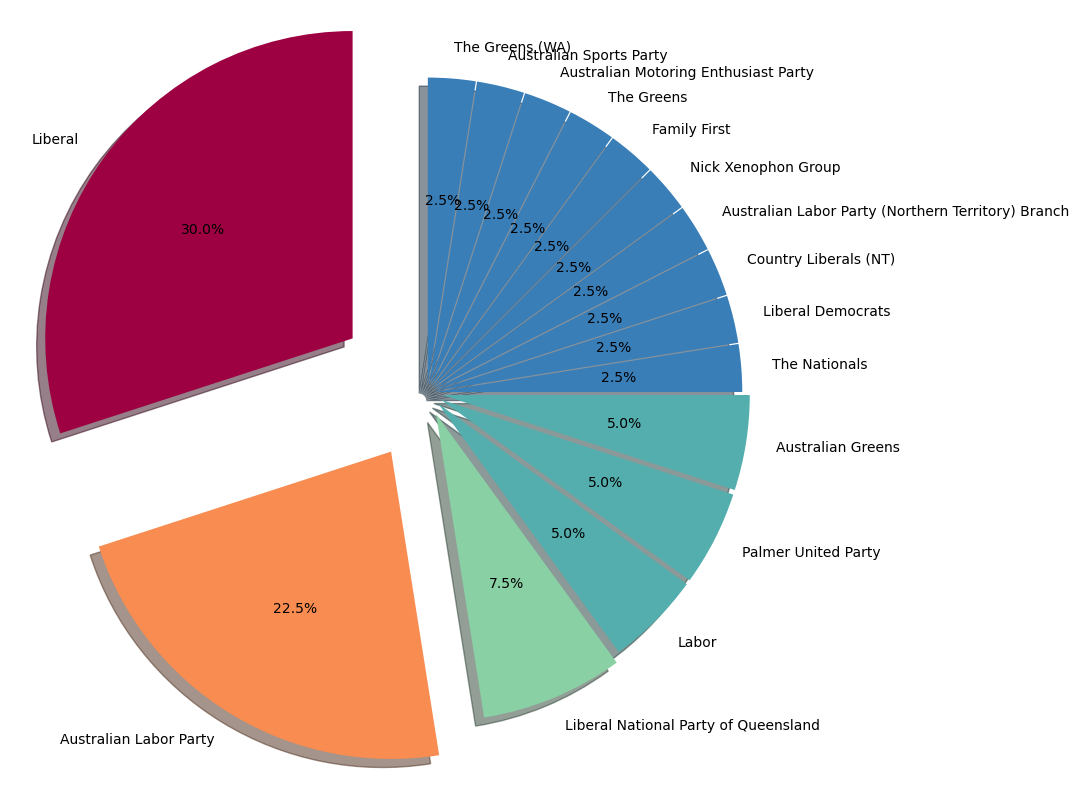

In [24]:
plt.figure(figsize=(10,10))

plt.pie(sizes, labels=labels,   
        explode=sizes, 
        autopct='%1.1f%%',
        colors=cm.Spectral_r(sizes/sizes.max()), 
        shadow=True, 
        startangle=90)

plt.axis('equal')

plt.show()

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3><br>
Note that Python does not get confused by expressions where the same name appears on both sides of an equality, like <code>labels=labels</code> in:
<pre>plt.pie(sizes, labels=labels,   
        explode=sizes, 
        autopct='%1.1f%%',
        colors=cm.Spectral_r(sizes/sizes.max()), 
        shadow=True, 
        startangle=90)
</pre>
 

The <code>labels</code> on the left is the name for one of the <b>attributes</b> of the function <code>plt.pie()</code>.

You can think of it as a <b>local variable</b>, only defined within the function.

The <code>labels</code> on the right of the equal sign is <b>our</b> variable which we have defined <b>outside</b> of the function.

Python handles namespaces in such a way that there is (usually) no clash between local and global variables.

</div>
<div>
<h4>You should experiment with the code to make sure you understand how it works and how you can adapt it to your taste.</h4>

For instance, if we wanted each slice to have its own color irrespective of its size, the code below will do just that. 
</div>

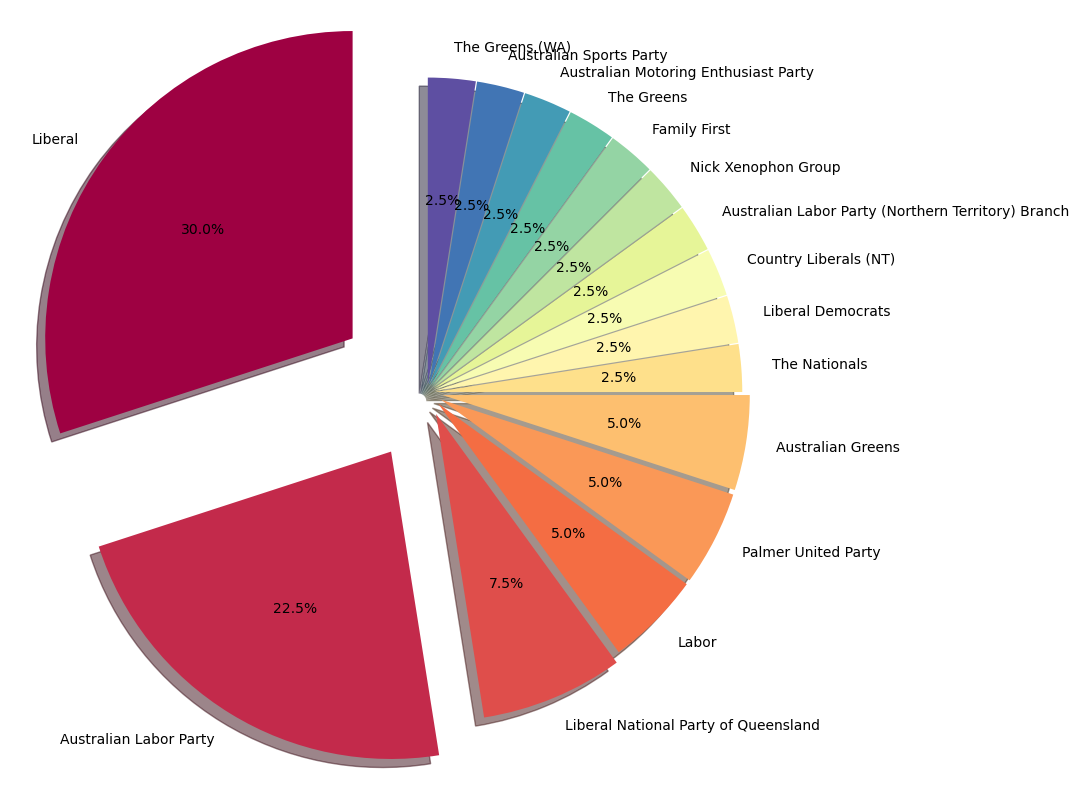

In [25]:
colors = np.linspace(0, 1, labels.size) # split the [0 1] interval in labels.size chunks.

plt.figure(figsize=(10,10))

plt.pie(sizes, labels=labels, 
        explode=sizes, 
        autopct='%1.1f%%', 
        colors=cm.Spectral(colors), 
        shadow=True, 
        startangle=90)

plt.axis('equal')
plt.show()

#### We could also come to our senses and plot the data as a bar chart...

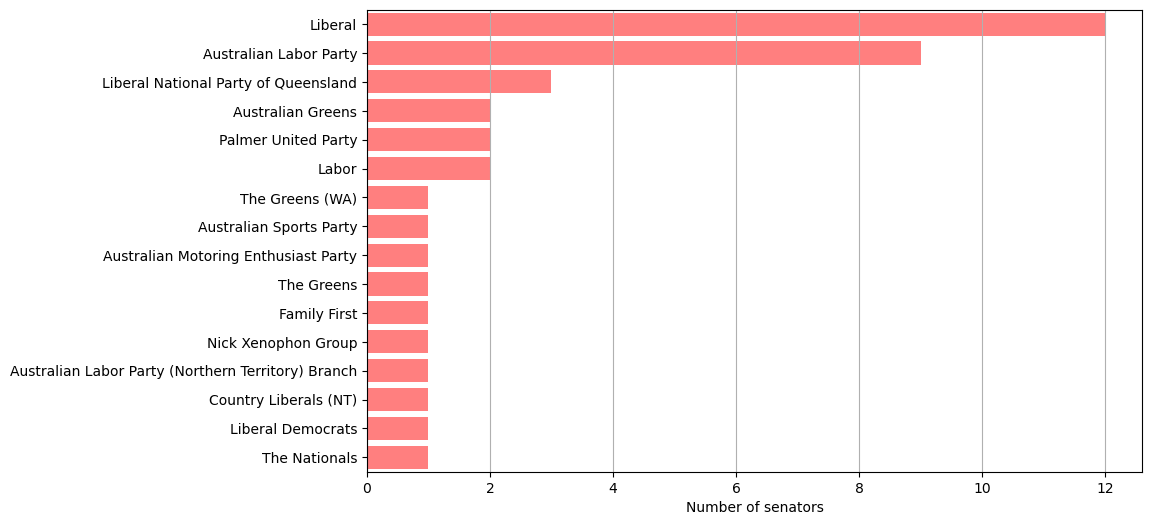

In [26]:
s = df.PartyNm.value_counts(ascending=True)

labels, sizes = s.index.values, s.values

pos = np.arange(len(labels))

plt.figure(figsize=(10,6))

plt.barh(pos, sizes, color='r', alpha=0.5, align='center')

plt.xticks(np.arange(sizes[-1]+1)[::2])
plt.yticks(pos, labels)

plt.ylim(pos[0]-0.5, max(pos)+0.5)

plt.xlabel('Number of senators')
plt.grid(which='major', axis='x')

plt.show()

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>Pandas dataframes have a special interface to many matplotlib functions which can speed up visualising the data.</p>
<p>Most common matplotlib plot types (bar charts, line plots, histograms) have a convenient Pandas interface.</p>
<p>Which method you use to plot your data will depend on how complex the plot is, and how much control over the finer aspects of the plot you require.</p>
</div>

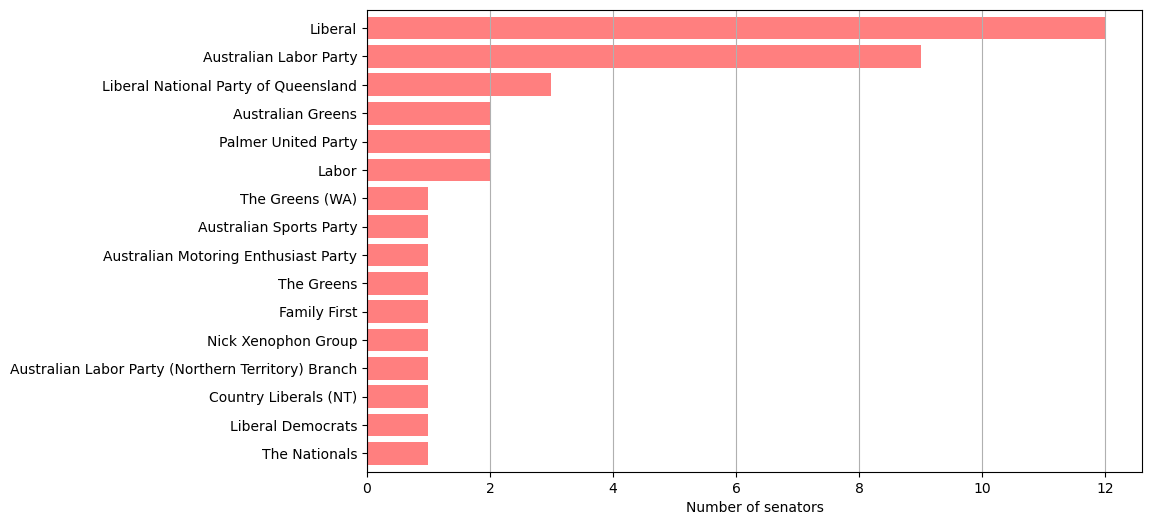

In [27]:
s = df.PartyNm.value_counts(ascending=True)
ax = s.plot(kind='barh', color='r', alpha=0.5, width=0.8, figsize=(10, 6))
ax.set_xlabel('Number of senators')
ax.grid(which='major', axis='x');


<div style="background-color:#F7F2E0;">
<h1><font color=MediumVioletRed>Practice makes perfect.</font></h1>
<br>
Study the code above and make sure you understand how it works, then create a <b>vertical</b> bar chart version of the plot using <code>plt.bar</code>.

</div>


<div>
<br>
<br>

<div style="background-color:#F7F2E0;">
<h1><font color=MediumVioletRed>Practice makes perfect.</font></h1>

Using the AEC data:
<ol>
<li> Output a list of senators whose elected order is 6. </li><br>
<li> Output a list of the number of senators for each state or territory.</li><br>
<li> Output a list of senators whose surname is more than 9 characters long. </li>
</ol>
</div>
<br>
</div>

<div>
<br>
<br>

<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect.</font></h1>

Download the data for the House of Representatives containing the list of <a href="http://results.aec.gov.au/17496/Website/HouseDownloadsMenu-17496-csv.htm">members elected</a> and conduct a similar analysis for that
dataset.<br> Create new cells below as needed. <br>
<b>Do not forget to save and backup your work</b>.


Also feel free to explore the other data sets available at http://results.aec.gov.au/.

</div>
<br>
</div>

<div style="background-color:#FBEFFB;"><p style="font-size:20px;color:#FF0080">&#9888; Beware: Is your analysis reproducible?</p> <!--- Warning --->
<p>This dataset was small enough that we could have just tallied the numbers by hand. However, this is a <b>bad idea</b>.</p>

<p>Writing code to analyse data is not just something we have to do to handle large datasets, it is about <b>reproducible research</b>. 
When you do things by hand, and this includes clicking through menu items in a spreadsheet software, unless you make a record of
<b>absolutely every step</b> you have taken in the analysis, you will not be able to remember exactly what you have done to the data. This means that if you come back to the project a year, a month, or sometimes just a few days after you have completed the analysis, you may not be able to figure out what you did in the first place.
</p>
<p>Furthermore, if you redo the analysis and get a different result, how will you know whether the original analysis was correct, or
you stuffed up the new analysis? This is bad research, bad science, bad workflow, bad coding... Well, you get the gist... It is <b>baaaad!</b></p>

<p> When you write a code that produces the final analysis starting from the raw data, all the steps are automatically recorded 
in the source code for you (it is still a good idea to include comments in your code to explain what each non-trivial section does).
Effectively, you should treat the raw data as <b>read only</b>. Any manipulation, or alteration of the data should be done by your code.</p>

<p>
With the Jupyter notebook it is even better. You can have everything (source code, comments, web links, graphics...) in one convenient location. Therefore, get into the habit of writing a program even if you are analysing a simple, small dataset. It will help you improve your coding skills and it will ensure that your work is <b>reproducible</b>.
</p>

<p>Finally, even if you write a well documented code that performs the entire analysis starting from the raw data, your results may still change if you re-run the code a few months later, simply because you are using a different version of the software. Therefore it is also a good idea to record the version of every important piece of software you are using. On the machines used in class, an easy way to do that is to run <code>!/Application/anaconda3/bin/conda list</code> in a code cell of the notebook.</p>

</div>

<div>
<br>
<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> Practice, Practice, Practice</h1>
<ul>

<li> Work through the notebook again and make sure you understand <em>every concept and every line of code</em>.</li><br>
<li> Do the tutorial problems that you can find on Canvas.</li><br>
<li> Feel free to download and experiment with other datasets from the AEC website.</li><br>
<li> To appreciate the importance of <b>reproducible research</b>, read the article <a href="http://www.nytimes.com/2011/07/08/health/research/08genes.html">How Bright Promise in Cancer Testing Fell Apart</a>.<br></li>
</ul>
</div>

> Material by Adel Rahmani